# Procesamiento de lenguaje natural con Python: NLTK toolkit

*Rocío Romero Zaliz* - rocio@decsai.ugr.es - @RCRZ_UGR

https://github.com/rcrzarg/Docencia.git

## Requisitos
* Python
* NLTK
* WordCloud
* feedparser
* BeautifulSoup

### Opcional...
* tweepy

## Primeros pasos

Comenzamos descargando el NLTK de la pagina web http://www.nltk.org

In [1]:
import nltk
print('¡Usando NLTK version {}!'.format(nltk.__version__))
# Hacer nltk.download() solo la primera vez

¡Usando NLTK version 3.3!


## Procesando nuestro primer texto
### Cargo un texto

In [2]:
import urllib.request
url = "http://www.gutenberg.org/files/2554/2554-0.txt"
raw = urllib.request.urlopen(url).read()

### Inspecciono el texto

In [3]:
type(raw)

bytes

In [4]:
len(raw)

1201733

In [5]:
raw[:80]

b'\xef\xbb\xbfThe Project Gutenberg EBook of Crime and Punishment, by Fyodor Dostoevsky\r\n\r\n'

### En mi caso debo limpiar el texto a un formato legible

In [6]:
text = raw.decode("utf-8")
text[:78]

'\ufeffThe Project Gutenberg EBook of Crime and Punishment, by Fyodor Dostoevsky\r\n\r\n'

In [7]:
import re

text = re.sub('\n+', ' ', text)
plain_text = re.sub('[^A-Za-z0-9 ,\.;:\-\’\'\"]+', '', text)
plain_text[:73]

'The Project Gutenberg EBook of Crime and Punishment, by Fyodor Dostoevsky'

In [8]:
type(plain_text)

str

## Analizando el texto

### Frases

In [9]:
sentences = nltk.sent_tokenize(plain_text)
sentences[0:5]

['The Project Gutenberg EBook of Crime and Punishment, by Fyodor Dostoevsky  This eBook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever.',
 'You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.org   Title: Crime and Punishment  Author: Fyodor Dostoevsky  Release Date: March 28, 2006 EBook 2554 Last Updated: October 27, 2016  Language: English  Character set encoding: UTF-8   START OF THIS PROJECT GUTENBERG EBOOK CRIME AND PUNISHMENT      Produced by John Bickers; and Dagny      CRIME AND PUNISHMENT  By Fyodor Dostoevsky    Translated By Constance Garnett     TRANSLATOR’S PREFACE  A few words about Dostoevsky himself may help the English reader to understand his work.',
 'Dostoevsky was the son of a doctor.',
 'His parents were very hard-working and deeply religious people, but so poor that they lived with their five children in only two rooms.',
 'The fath

### Tokens

In [10]:
print(sentences[22])

tokens = nltk.word_tokenize(sentences[22])
tokens

The intense suffering of this experience left a lasting stamp on Dostoevsky’s mind.


['The',
 'intense',
 'suffering',
 'of',
 'this',
 'experience',
 'left',
 'a',
 'lasting',
 'stamp',
 'on',
 'Dostoevsky',
 '’',
 's',
 'mind',
 '.']

### Stems

In [11]:
porter = nltk.PorterStemmer()
stems = [porter.stem(t) for t in tokens]
stems

['the',
 'intens',
 'suffer',
 'of',
 'thi',
 'experi',
 'left',
 'a',
 'last',
 'stamp',
 'on',
 'dostoevski',
 '’',
 's',
 'mind',
 '.']

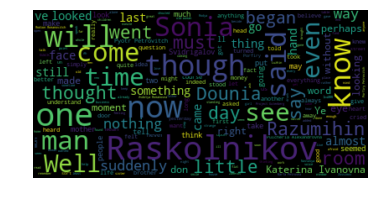

In [12]:
# Para instalar WordCloud: en una terminal -> pip install wordcloud
from wordcloud import WordCloud

wordcloud = WordCloud(max_font_size=40).generate(plain_text)

import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

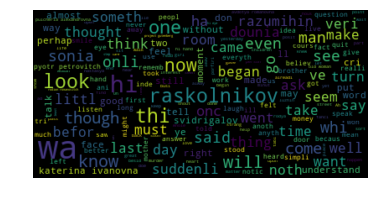

In [13]:
all_tokens = [nltk.word_tokenize(t) for t in sentences]
all_stems = [porter.stem(k) for t in all_tokens for k in t]

wordcloud = WordCloud(max_font_size=40).generate(' '.join(all_stems))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Lemmas

In [14]:
wnl = nltk.stem.WordNetLemmatizer()
lemmas = [wnl.lemmatize(t) for t in tokens]
lemmas # Algo no va bien...

['The',
 'intense',
 'suffering',
 'of',
 'this',
 'experience',
 'left',
 'a',
 'lasting',
 'stamp',
 'on',
 'Dostoevsky',
 '’',
 's',
 'mind',
 '.']

In [15]:
full_text = sum(all_tokens, [])
full_text = nltk.Text(full_text)

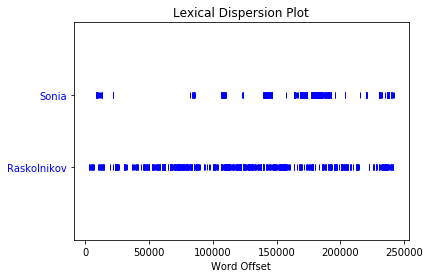

In [16]:
full_text.dispersion_plot(["Sonia","Raskolnikov"])

In [17]:
full_text.similar("heart")

face mind head mother room eyes hand brother life way wife voice
sister money name illness lips words door hands


In [18]:
fdist1 = nltk.FreqDist(full_text)
fdist1.hapaxes()[:10]

['Title',
 'Author',
 'Release',
 'Date',
 'March',
 '28',
 '2006',
 '2554',
 'October',
 '27']

In [19]:
fdist1.most_common(15)

[(',', 16178),
 ('.', 10454),
 ('the', 7444),
 ('and', 6284),
 ('to', 5284),
 ('a', 4472),
 ('I', 4399),
 ('’', 4046),
 ('of', 3849),
 ('he', 3535),
 ('you', 3506),
 ('in', 3101),
 ('that', 3082),
 ('it', 2943),
 ('was', 2803)]

### Part of speech (POS)

In [20]:
tags = nltk.pos_tag(tokens)
tags

[('The', 'DT'),
 ('intense', 'JJ'),
 ('suffering', 'NN'),
 ('of', 'IN'),
 ('this', 'DT'),
 ('experience', 'NN'),
 ('left', 'VBD'),
 ('a', 'DT'),
 ('lasting', 'JJ'),
 ('stamp', 'NN'),
 ('on', 'IN'),
 ('Dostoevsky', 'NNP'),
 ('’', 'NNP'),
 ('s', 'NN'),
 ('mind', 'NN'),
 ('.', '.')]

In [21]:
#nltk.download('tagsets')
print(nltk.help.upenn_tagset('DT'))
print(nltk.help.upenn_tagset('IN'))

DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
None
IN: preposition or conjunction, subordinating
    astride among uppon whether out inside pro despite on by throughout
    below within for towards near behind atop around if like until below
    next into if beside ...
None


In [22]:
from nltk.corpus import wordnet

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
lemmas = [wnl.lemmatize(t[0], get_wordnet_pos(t[1])) for t in tags]
lemmas

['The',
 'intense',
 'suffering',
 'of',
 'this',
 'experience',
 'leave',
 'a',
 'lasting',
 'stamp',
 'on',
 'Dostoevsky',
 '’',
 's',
 'mind',
 '.']

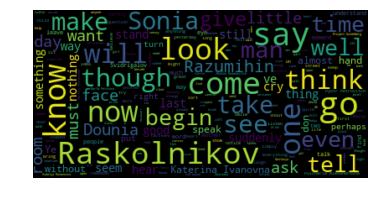

In [23]:
all_tags = [nltk.pos_tag(t) for t in all_tokens]
all_lemmas = [wnl.lemmatize(k[0], get_wordnet_pos(k[1])) for t in all_tags for k in t]

wordcloud = WordCloud(max_font_size=40).generate(' '.join(all_lemmas))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [24]:
'said' in all_lemmas

False

In [25]:
'say' in all_lemmas

True

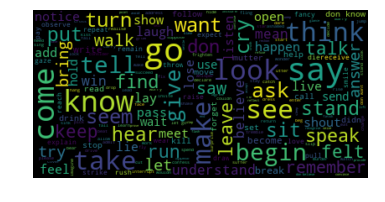

In [26]:
full_tags = sum(all_tags, [])
all_lemmas_v = [all_lemmas[t] for t in range(0,len(all_lemmas)-1) if full_tags[t][1][0] == 'V']

wordcloud = WordCloud(max_font_size=40).generate(' '.join(all_lemmas_v))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

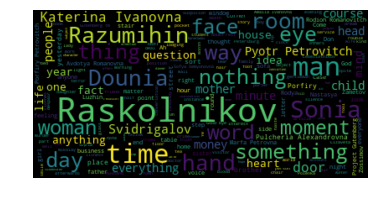

In [27]:
all_lemmas_n = [all_lemmas[t] for t in range(0,len(all_lemmas)-1) if full_tags[t][1][0] == 'N']

wordcloud = WordCloud(max_font_size=40).generate(' '.join(all_lemmas_n))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Entidades nombradas

* ORGANIZATION
* PERSON
* GPE (geo-political entities)

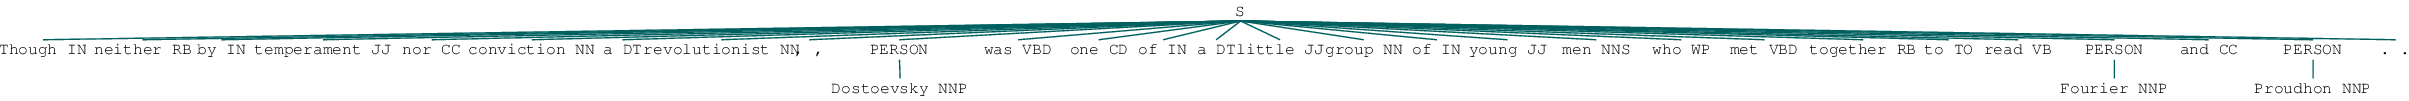

In [28]:
tokens = nltk.word_tokenize(sentences[11])
tags = nltk.pos_tag(tokens)
result = nltk.ne_chunk(tags)
result

In [29]:
type(result)

nltk.tree.Tree

In [30]:
print(result)

(S
  Though/IN
  neither/RB
  by/IN
  temperament/JJ
  nor/CC
  conviction/NN
  a/DT
  revolutionist/NN
  ,/,
  (PERSON Dostoevsky/NNP)
  was/VBD
  one/CD
  of/IN
  a/DT
  little/JJ
  group/NN
  of/IN
  young/JJ
  men/NNS
  who/WP
  met/VBD
  together/RB
  to/TO
  read/VB
  (PERSON Fourier/NNP)
  and/CC
  (PERSON Proudhon/NNP)
  ./.)


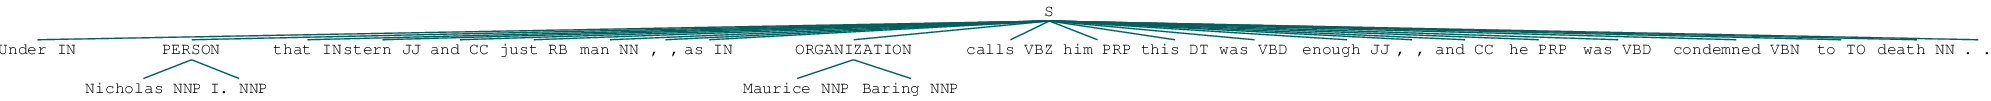

In [31]:
tokens = nltk.word_tokenize(sentences[13])
tags = nltk.pos_tag(tokens)
nltk.ne_chunk(tags)

### Fragmentación

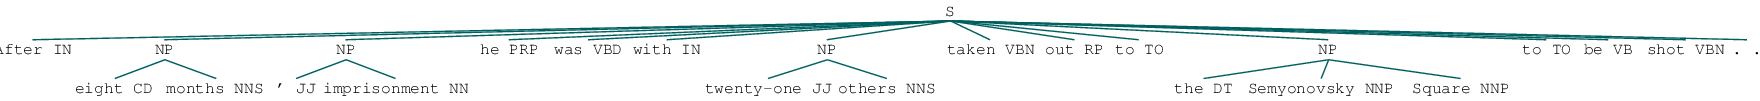

In [32]:
grammar = "NP: {<DT>?<JJ>*<CD|NN|NNP|NNS>*}"

tokens = nltk.word_tokenize(sentences[14])
tags = nltk.pos_tag(tokens)
cp = nltk.RegexpParser(grammar)
result = cp.parse(tags)
result

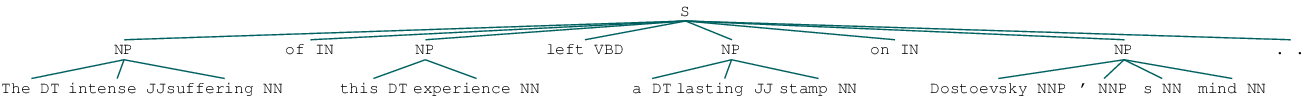

In [33]:
tokens = nltk.word_tokenize(sentences[22])
tags = nltk.pos_tag(tokens)
cp = nltk.RegexpParser(grammar)
result = cp.parse(tags)
result

## Crear nuestros propios POS taggers

### Default tagger

In [44]:
from nltk.corpus import brown
brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')
type(brown_tagged_sents)

nltk.corpus.reader.util.ConcatenatedCorpusView

In [45]:
brown_tagged_sents[1]

[('The', 'AT'),
 ('jury', 'NN'),
 ('further', 'RBR'),
 ('said', 'VBD'),
 ('in', 'IN'),
 ('term-end', 'NN'),
 ('presentments', 'NNS'),
 ('that', 'CS'),
 ('the', 'AT'),
 ('City', 'NN-TL'),
 ('Executive', 'JJ-TL'),
 ('Committee', 'NN-TL'),
 (',', ','),
 ('which', 'WDT'),
 ('had', 'HVD'),
 ('over-all', 'JJ'),
 ('charge', 'NN'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('election', 'NN'),
 (',', ','),
 ('``', '``'),
 ('deserves', 'VBZ'),
 ('the', 'AT'),
 ('praise', 'NN'),
 ('and', 'CC'),
 ('thanks', 'NNS'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('City', 'NN-TL'),
 ('of', 'IN-TL'),
 ('Atlanta', 'NP-TL'),
 ("''", "''"),
 ('for', 'IN'),
 ('the', 'AT'),
 ('manner', 'NN'),
 ('in', 'IN'),
 ('which', 'WDT'),
 ('the', 'AT'),
 ('election', 'NN'),
 ('was', 'BEDZ'),
 ('conducted', 'VBN'),
 ('.', '.')]

In [46]:
brown_tags = [k[1] for t in brown_tagged_sents for k in t]
nltk.FreqDist(brown_tags).max()

'NN'

In [47]:
tokens = nltk.word_tokenize(sentences[22])
default_tagger = nltk.DefaultTagger('NN')
default_tagger.tag(tokens)

[('The', 'NN'),
 ('intense', 'NN'),
 ('suffering', 'NN'),
 ('of', 'NN'),
 ('this', 'NN'),
 ('experience', 'NN'),
 ('left', 'NN'),
 ('a', 'NN'),
 ('lasting', 'NN'),
 ('stamp', 'NN'),
 ('on', 'NN'),
 ('Dostoevsky', 'NN'),
 ('’', 'NN'),
 ('s', 'NN'),
 ('mind', 'NN'),
 ('.', 'NN')]

In [48]:
default_tagger.evaluate(brown_tagged_sents)

0.13089484257215028

### Regular Expression Tagger

In [49]:
patterns = [
     (r'.*ing$', 'VBG'),               # gerunds
     (r'.*ed$', 'VBD'),                # simple past
     (r'.*es$', 'VBZ'),                # 3rd singular present
     (r'.*ould$', 'MD'),               # modals
     (r'.*\'s$', 'NN$'),               # possessive nouns
     (r'.*s$', 'NNS'),                 # plural nouns
     (r'^-?[0-9]+(.[0-9]+)?$', 'CD'),  # cardinal numbers
     (r'.*', 'NN')                     # nouns (default)
]
regexp_tagger = nltk.RegexpTagger(patterns)
regexp_tagger.tag(tokens)

[('The', 'NN'),
 ('intense', 'NN'),
 ('suffering', 'VBG'),
 ('of', 'NN'),
 ('this', 'NNS'),
 ('experience', 'NN'),
 ('left', 'NN'),
 ('a', 'NN'),
 ('lasting', 'VBG'),
 ('stamp', 'NN'),
 ('on', 'NN'),
 ('Dostoevsky', 'NN'),
 ('’', 'NN'),
 ('s', 'NNS'),
 ('mind', 'NN'),
 ('.', 'NN')]

In [50]:
regexp_tagger.evaluate(brown_tagged_sents)

0.20326391789486245

### N-Gram tagger

In [51]:
size = int(len(brown_tagged_sents) * 0.9)
unigram_tagger = nltk.UnigramTagger(brown_tagged_sents[:size])
unigram_tagger.tag(brown_sents[2007])

[('Various', 'JJ'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('apartments', 'NNS'),
 ('are', 'BER'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('terrace', 'NN'),
 ('type', 'NN'),
 (',', ','),
 ('being', 'BEG'),
 ('on', 'IN'),
 ('the', 'AT'),
 ('ground', 'NN'),
 ('floor', 'NN'),
 ('so', 'QL'),
 ('that', 'CS'),
 ('entrance', 'NN'),
 ('is', 'BEZ'),
 ('direct', 'JJ'),
 ('.', '.')]

In [52]:
brown_tagged_sents

[[('The', 'AT'), ('Fulton', 'NP-TL'), ('County', 'NN-TL'), ('Grand', 'JJ-TL'), ('Jury', 'NN-TL'), ('said', 'VBD'), ('Friday', 'NR'), ('an', 'AT'), ('investigation', 'NN'), ('of', 'IN'), ("Atlanta's", 'NP$'), ('recent', 'JJ'), ('primary', 'NN'), ('election', 'NN'), ('produced', 'VBD'), ('``', '``'), ('no', 'AT'), ('evidence', 'NN'), ("''", "''"), ('that', 'CS'), ('any', 'DTI'), ('irregularities', 'NNS'), ('took', 'VBD'), ('place', 'NN'), ('.', '.')], [('The', 'AT'), ('jury', 'NN'), ('further', 'RBR'), ('said', 'VBD'), ('in', 'IN'), ('term-end', 'NN'), ('presentments', 'NNS'), ('that', 'CS'), ('the', 'AT'), ('City', 'NN-TL'), ('Executive', 'JJ-TL'), ('Committee', 'NN-TL'), (',', ','), ('which', 'WDT'), ('had', 'HVD'), ('over-all', 'JJ'), ('charge', 'NN'), ('of', 'IN'), ('the', 'AT'), ('election', 'NN'), (',', ','), ('``', '``'), ('deserves', 'VBZ'), ('the', 'AT'), ('praise', 'NN'), ('and', 'CC'), ('thanks', 'NNS'), ('of', 'IN'), ('the', 'AT'), ('City', 'NN-TL'), ('of', 'IN-TL'), ('Atlant

In [53]:
unigram_tagger.evaluate(brown_tagged_sents[size:])

0.8121200039868434

In [54]:
bigram_tagger = nltk.BigramTagger(brown_tagged_sents[:size])
bigram_tagger.tag(brown_sents[2007])

[('Various', 'JJ'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('apartments', 'NNS'),
 ('are', 'BER'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('terrace', 'NN'),
 ('type', 'NN'),
 (',', ','),
 ('being', 'BEG'),
 ('on', 'IN'),
 ('the', 'AT'),
 ('ground', 'NN'),
 ('floor', 'NN'),
 ('so', 'CS'),
 ('that', 'CS'),
 ('entrance', 'NN'),
 ('is', 'BEZ'),
 ('direct', 'JJ'),
 ('.', '.')]

In [55]:
bigram_tagger.evaluate(brown_tagged_sents[size:])

0.10206319146815508

In [56]:
t0 = nltk.DefaultTagger('NN')
t1 = nltk.UnigramTagger(brown_tagged_sents[:size], backoff=t0)
t2 = nltk.BigramTagger(brown_tagged_sents[:size], backoff=t1)
t2.evaluate(brown_tagged_sents[size:])

0.8452108043456593

In [57]:
real = [k[1] for t in brown_tagged_sents[size:] for k in t]
calculated = [k[1] for t in [t2.tag(t) for t in brown_sents[size:]] for k in t]

cm = nltk.ConfusionMatrix(real, calculated)
print(cm.pretty_format(sort_by_count=True, show_percents=True, truncate=10))

    |                           N                                           |
    |      N      I      A      N             J             N      C      V |
    |      N      N      T      S      ,      J      .      P      C      B |
----+-----------------------------------------------------------------------+
 NN | <12.0%>     .   0.0%   0.1%      .   0.2%      .      .      .   0.2% |
 IN |   0.0% <10.1%>     .      .      .      .      .      .      .      . |
 AT |      .      .  <8.5%>     .      .      .      .      .      .      . |
NNS |   1.9%      .      .  <4.3%>     .      .      .      .      .      . |
  , |      .      .      .      .  <6.0%>     .      .      .      .      . |
 JJ |   1.3%      .      .      .      .  <3.4%>     .   0.0%      .   0.0% |
  . |      .      .      .      .      .      .  <4.8%>     .      .      . |
 NP |   1.7%      .      .      .      .      .      .  <2.7%>     .      . |
 CC |      .      .      .      .      .      .      .      .  <

### Arreglando el etiquetado

In [58]:
templates = nltk.tag.brill.fntbl37()
templates

[Template(Word([0]),Word([1]),Word([2])),
 Template(Word([-1]),Word([0]),Word([1])),
 Template(Word([0]),Word([-1])),
 Template(Word([0]),Word([1])),
 Template(Word([0]),Word([2])),
 Template(Word([0]),Word([-2])),
 Template(Word([1, 2])),
 Template(Word([-2, -1])),
 Template(Word([1, 2, 3])),
 Template(Word([-3, -2, -1])),
 Template(Word([0]),Pos([2])),
 Template(Word([0]),Pos([-2])),
 Template(Word([0]),Pos([1])),
 Template(Word([0]),Pos([-1])),
 Template(Word([0])),
 Template(Word([-2])),
 Template(Word([2])),
 Template(Word([1])),
 Template(Word([-1])),
 Template(Pos([-1]),Pos([1])),
 Template(Pos([1]),Pos([2])),
 Template(Pos([-1]),Pos([-2])),
 Template(Pos([1])),
 Template(Pos([-1])),
 Template(Pos([-2])),
 Template(Pos([2])),
 Template(Pos([1, 2, 3])),
 Template(Pos([1, 2])),
 Template(Pos([-3, -2, -1])),
 Template(Pos([-2, -1])),
 Template(Pos([1]),Word([0]),Word([1])),
 Template(Pos([1]),Word([0]),Word([-1])),
 Template(Pos([-1]),Word([-1]),Word([0])),
 Template(Pos([-1]),Word

In [59]:
t3 = nltk.BrillTaggerTrainer(t2, templates)
t3

In [60]:
braubt_tagger = t3.train(brown_tagged_sents[:size], max_rules=100, min_score=3)
braubt_tagger.evaluate(brown_tagged_sents[size:])

0.8524867935811821

In [61]:
t3 = nltk.BrillTaggerTrainer(t2, templates, trace=3)
braubt_tagger = t3.train(brown_tagged_sents[:size], max_rules=100, min_score=3)

TBL train (fast) (seqs: 4160; tokens: 90521; tpls: 37; min score: 3; min acc: None)
Finding initial useful rules...
    Found 62455 useful rules.

           B      |
   S   F   r   O  |        Score = Fixed - Broken
   c   i   o   t  |  R     Fixed = num tags changed incorrect -> correct
   o   x   k   h  |  u     Broken = num tags changed correct -> incorrect
   r   e   e   e  |  l     Other = num tags changed incorrect -> incorrect
   e   d   n   r  |  e
------------------+-------------------------------------------------------
 260 260   0   1  | TO->IN if Pos:AT@[1]
  81  81   0   1  | TO->IN if Pos:NP@[1]
  52  52   0   0  | TO->IN if Word:to@[0] & Pos:NN@[1]
  43  43   0   0  | TO->IN if Pos:NNS@[1]
  42  43   1   0  | CS->QL if Word:as@[1,2,3]
  34  36   2   0  | TO->IN if Word:to@[0] & Pos:JJ@[1]
  28  28   0   0  | IN->TO if Word:to@[0] & Pos:VB@[1]
  25  25   0   0  | TO->IN if Pos:PP$@[1]
  22  22   0   0  | TO->IN if Word:to@[0] & Pos:CD@[1]
  18  18   0   0  | CS->WPS if 

## ¡Manos a la obra!
Podéis probar descargar texto de diferentes fuentes.

### Cómo leer de un RSS

In [62]:
import feedparser
rss_text = feedparser.parse("http://osl.ugr.es/?feed=atom")
rss_text['feed']['title']

'Oficina de Software Libre'

In [63]:
rss_text.entries[0]

{'author': 'Mila',
 'author_detail': {'name': 'Mila'},
 'authors': [{'name': 'Mila'}],
 'content': [{'base': 'http://osl.ugr.es/2018/09/14/software-freedom-day-2018/',
   'language': 'es-ES',
   'type': 'text/html',
   'value': '<p>El próximo día 15 de Septiembre de 2018 los usuarios de software libre estamos de enhorabuena, ya que se celebra el\xa0<a href="https://www.softwarefreedomday.org/">Software Freedom Day.</a> Se trata de uno de los eventos más importantes dentro del mundo del software libre, el cual además se realiza a nivel mundial. Este evento se inició en el año 2004, fecha en la que se decidió su creación, celebrándose por primera vez el día 28 de agosto de ese mismo año. Desde el año 2006, se decidió que se realizaría el tercer sábado de septiembre de cada año.</p>\n<p>&nbsp;</p>\n<p><img class="irc_mi" src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/71/SFDLogo.svg/1280px-SFDLogo.svg.png" alt="Resultado de imagen de Software Freedom Day" width="989" height="2

In [64]:
entrada = rss_text.entries[0].content[0]['value']
entrada

'<p>El próximo día 15 de Septiembre de 2018 los usuarios de software libre estamos de enhorabuena, ya que se celebra el\xa0<a href="https://www.softwarefreedomday.org/">Software Freedom Day.</a> Se trata de uno de los eventos más importantes dentro del mundo del software libre, el cual además se realiza a nivel mundial. Este evento se inició en el año 2004, fecha en la que se decidió su creación, celebrándose por primera vez el día 28 de agosto de ese mismo año. Desde el año 2006, se decidió que se realizaría el tercer sábado de septiembre de cada año.</p>\n<p>&nbsp;</p>\n<p><img class="irc_mi" src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/71/SFDLogo.svg/1280px-SFDLogo.svg.png" alt="Resultado de imagen de Software Freedom Day" width="989" height="280" /></p>\n<p>¿Pero, qué es el Software Freedom Day? Se trata de una actividad enfocada a la promoción del software libre y de sus beneficios, en la que se celebran multitud de actividades por todo el mundo. Con la realización 

In [65]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(entrada, 'html.parser')
rss_text = soup.get_text()
rss_text

'El próximo día 15 de Septiembre de 2018 los usuarios de software libre estamos de enhorabuena, ya que se celebra el\xa0Software Freedom Day. Se trata de uno de los eventos más importantes dentro del mundo del software libre, el cual además se realiza a nivel mundial. Este evento se inició en el año 2004, fecha en la que se decidió su creación, celebrándose por primera vez el día 28 de agosto de ese mismo año. Desde el año 2006, se decidió que se realizaría el tercer sábado de septiembre de cada año.\n\xa0\n\n¿Pero, qué es el Software Freedom Day? Se trata de una actividad enfocada a la promoción del software libre y de sus beneficios, en la que se celebran multitud de actividades por todo el mundo. Con la realización de este evento se pretende impulsar el uso del software libre en diferentes ámbitos como el educativo, el gubernamental, el personal y el empresarial.\nEste evento es organizado por la Software Freedom International, que es una organización sin ánimo de lucro y que se enc

### Cómo leer de un PDF

In [68]:
from PyPDF2 import PdfFileReader

pdf_text = PdfFileReader(open("Parcial2_Practico_Grupo_A.pdf", "rb"))
pdf_text = pdf_text.getPage(0).extractText().encode("utf8")
pdf_text

b'Fundamentos de Bases de Datos. Grupo A \nParcial 2. Ejercicio Pr\xe2\x81\x84ctico \nNombre Alumno: \nProfesor del Grupo: \nDisponemos de la siguiente BD que gestiona libros,copias y pr\xe2\x80\x9dstamos en una biblioteca:\n  Se pide: \nA.Escribir las sentencias SQL para crear tablas \nCopia y \nPrestado suponiendo que el \nresto de las tablas ya est\xe2\x81\x84n creadas. Debe tenerse en cuenta lo siguiente: \na.Deben consignarse todas las restricciones indicadas en el esquema. \nb.Todos los campos son de tipo alfanum\xe2\x80\x9drico, salvo Fecha que es de tipo date. \nc.El a\xc5\x92o 2012 la biblioteca estuvo cerrada por reformas, por lo que debe evitarse \nque se introduzcan pr\xe2\x80\x9dstamos durante ese a\xc5\x92o. (\n2.5 pts.\n). \nB.Expresar mediante \xc3\xa7lgebra y C\xe2\x81\x84lculo las siguientes consultas (\n1.25 pt.\n cada una): \na.\xc3\x92Encontrar el nombre de los usuarios que han tomado prestado todos los libros \nde la biblioteca\xc3\x93.  \nb.\xc3\x92Mostrar el t\x

In [70]:
pdf_text = PdfFileReader(open("programa_jsl.pdf", "rb"))
pdf_text.getNumPages()

2

In [71]:
pdf_text.getPage(0).extractText().encode("utf8")

b'\n\n\n\n\xcb\x98\xcb\x87\xcb\x86\n\xcb\x99\xcb\x9d\xcb\x9c\n\xcb\x99\xcb\x9d \n!"#%!\n\xcb\x99(\xcb\x99(\xcb\x87)*+\xcb\x99))\xcb\x86\xcb\x99)\xcb\x9d\n\xcb\x9c!#!!\n*\'*\xcb\x86)\n\xcb\x9c!#%!\n-\xcb\x9c./\'\xcb\x87)(\xcb\x99\xcb\x9d\xcb\x870\xcb\x86\xcb\x99/\xcb\x9b2\xcb\x86\xcb\x993\n4\xcb\x9b\xcb\x99\xcb\x865\xcb\x9d\xcb\x98\xcb\x99\xcb\x86\xcb\x9d7\n\xcb\x9c\xcb\x9c#!!\n- .&0\xcb\x87\xcb\x86\xcb\x99(*)/\xcb\x9b2\xcb\x86\xcb\x99\xcb\x87\xcb\x86\'3\n9\xcb\x9d\n\xcb\x86\xcb\x9d7\n\xcb\x9c\xcb\x9c#!!\xcb\x9c\xcb\x9c#%!\n*\xcb\x9d8\xcb\x86)05\n\xcb\x9c\xcb\x9c #!!\n-%.\xcb\x99\xcb\x99\xcb\x99(\xcb\x99\xcb\x9d\xcb\x9b\xcb\x9d&\xcb\x99\xcb\x9d\xcb\x878\xcb\x99\xcb\x86&\xcb\x9b4\xcb\x87\xcb\x9d3\n\xcb\x87\xcb\x9d5:;\n\xcb\x98\xcb\x99\xcb\x86:=\xcb\x99\xcb\x9d&\xcb\x86\xcb\x9b)(\xcb\x99\xcb\x86\xcb\x991\xcb\x9d?\xcb\x9b;\xcb\x87(\xcb\x86@\'*\xcb\x99:7\n\n-A.\xcb\x87&\xcb\x87\'\xcb\x86+\xcb\x99&\xcb\x86)\xcb\x9d\xcb\x870\xcb\x86\xcb\x99/\xcb\x9b2\xcb\x86\xcb\x99B\xcb\x9d\xcb\x87\xcb\x9d\x

### Cómo leer de Twitter

Si teneis cuenta de desarrollador en Twitter podeis usarla o crear una nueva. Deberéis instalar algunas cosillas siguiendo este tutorial: http://www.nltk.org/howto/twitter.html

In [99]:
from tweepy import OAuthHandler

consumer_key = 'YOUR-CONSUMER-KEY'
consumer_secret = 'YOUR-CONSUMER-SECRET'
access_token = 'YOUR-ACCESS-TOKEN'
access_secret = 'YOUR-ACCESS-SECRET'

In [100]:
import os

tfile = os.environ['TWITTER']

f = open(tfile + 'credentials.txt', "r")
dict = {}
for line in f:
    out = line. partition('=')
    dict[out[0]] = out[2].rstrip()
    
consumer_key = dict['app_key']
consumer_secret = dict['app_secret']
access_token = dict['oauth_token']
access_secret = dict['oauth_token_secret']

In [102]:
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
 
api = tweepy.API(auth)

In [108]:
for status in tweepy.Cursor(api.home_timeline).items(3):
    print(status.text)
    print('---')

RT @lamadrazacccugr: Programación Semanal (17 al 23 de Septiembre) de @lamadrazacccugr =&gt; https://t.co/tt3HqdYS5e @UGRmedia1 @CanalUGR @edu…
---
Nuevo curso de @UGRinvestiga 👉 https://t.co/j7JjMieaf9 #Letsgo https://t.co/kHxZ9UHa0t
---
🌊 El Instituto Español de Oceanografía @IEOoceanografia prestará asesoramiento científico y técnico al @mitecogob p… https://t.co/tOsjraxzR9
---


In [116]:
myTweet = tweepy.Cursor(api.search, q='#JSLUGR18').items(5)

for tweet in myTweet:
    print(tweet.created_at, tweet.text)
    print('---')

2018-09-17 13:12:05 RT @Hefistion_: #RT @ElBlogDeLazaro: RT @CompilanPodcast: Lunes de vuelta al trabajo. Háztelo más llevadero con #Gnu #linux en tus oídos. T…
---
2018-09-17 12:48:01 RT @Hefistion_: #RT @ElBlogDeLazaro: RT @CompilanPodcast: Lunes de vuelta al trabajo. Háztelo más llevadero con #Gnu #linux en tus oídos. T…
---
2018-09-17 12:41:25 #RT @ElBlogDeLazaro: RT @CompilanPodcast: Lunes de vuelta al trabajo. Háztelo más llevadero con #Gnu #linux en tus… https://t.co/69Ari7REx9
---
2018-09-17 12:37:21 RT @CompilanPodcast: Lunes de vuelta al trabajo. Háztelo más llevadero con #Gnu #linux en tus oídos. Todo el #softwarelibre en #CompilandoP…
---
2018-09-17 11:50:05 RT @CompilanPodcast: Lunes de vuelta al trabajo. Háztelo más llevadero con #Gnu #linux en tus oídos. Todo el #softwarelibre en #CompilandoP…
---


### Probemos con un texto en español...

* Probar dividir en frases, tokens, lemmas, etc.

In [117]:
sentences = nltk.sent_tokenize(rss_text)
sentences

['El próximo día 15 de Septiembre de 2018 los usuarios de software libre estamos de enhorabuena, ya que se celebra el\xa0Software Freedom Day.',
 'Se trata de uno de los eventos más importantes dentro del mundo del software libre, el cual además se realiza a nivel mundial.',
 'Este evento se inició en el año 2004, fecha en la que se decidió su creación, celebrándose por primera vez el día 28 de agosto de ese mismo año.',
 'Desde el año 2006, se decidió que se realizaría el tercer sábado de septiembre de cada año.',
 '¿Pero, qué es el Software Freedom Day?',
 'Se trata de una actividad enfocada a la promoción del software libre y de sus beneficios, en la que se celebran multitud de actividades por todo el mundo.',
 'Con la realización de este evento se pretende impulsar el uso del software libre en diferentes ámbitos como el educativo, el gubernamental, el personal y el empresarial.',
 'Este evento es organizado por la Software Freedom International, que es una organización sin ánimo de

In [118]:
tokens = nltk.word_tokenize(sentences[0])
tokens

['El',
 'próximo',
 'día',
 '15',
 'de',
 'Septiembre',
 'de',
 '2018',
 'los',
 'usuarios',
 'de',
 'software',
 'libre',
 'estamos',
 'de',
 'enhorabuena',
 ',',
 'ya',
 'que',
 'se',
 'celebra',
 'el',
 'Software',
 'Freedom',
 'Day',
 '.']

In [120]:
tags = nltk.pos_tag(tokens)
tags # Algo va muy mal...

[('El', 'NNP'),
 ('próximo', 'NN'),
 ('día', 'VBD'),
 ('15', 'CD'),
 ('de', 'FW'),
 ('Septiembre', 'NNP'),
 ('de', 'IN'),
 ('2018', 'CD'),
 ('los', 'JJ'),
 ('usuarios', 'FW'),
 ('de', 'FW'),
 ('software', 'NN'),
 ('libre', 'JJ'),
 ('estamos', 'NN'),
 ('de', 'IN'),
 ('enhorabuena', 'FW'),
 (',', ','),
 ('ya', 'PRP'),
 ('que', 'VBP'),
 ('se', 'JJ'),
 ('celebra', 'NN'),
 ('el', 'NN'),
 ('Software', 'NNP'),
 ('Freedom', 'NNP'),
 ('Day', 'NNP'),
 ('.', '.')]

### Probemos un POS tagger para español: https://nlp.stanford.edu/software/spanish-faq.shtml

In [121]:
from nltk.tag import StanfordPOSTagger

spanish_postagger = StanfordPOSTagger('models/spanish.tagger', 'stanford-postagger.jar', encoding='utf8')
tagged_words = spanish_postagger.tag(tokens)
tagged_words

[('El', 'da0000'),
 ('próximo', 'aq0000'),
 ('día', 'nc0s000'),
 ('15', 'z0'),
 ('de', 'sp000'),
 ('Septiembre', 'dn0000'),
 ('de', 'sp000'),
 ('2018', 'w'),
 ('los', 'da0000'),
 ('usuarios', 'nc0p000'),
 ('de', 'sp000'),
 ('software', 'nc0s000'),
 ('libre', 'aq0000'),
 ('estamos', 'vmip000'),
 ('de', 'sp000'),
 ('enhorabuena', 'nc0s000'),
 (',', 'fc'),
 ('ya', 'rg'),
 ('que', 'pr000000'),
 ('se', 'p0000000'),
 ('celebra', 'vmip000'),
 ('el', 'da0000'),
 ('Software', 'np00000'),
 ('Freedom', 'np00000'),
 ('Day', 'np00000'),
 ('.', 'fp')]

In [125]:
def get_stanford_pos(tag):
    if tag.startswith('a'):
        return wordnet.ADJ
    elif tag.startswith('v'):
        return wordnet.VERB
    elif tag.startswith('n'):
        return wordnet.NOUN
    elif tag.startswith('r'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
tagged = [(t[0], get_stanford_pos(t[1])) for t in tagged_words]
tagged

[('El', 'n'),
 ('próximo', 'a'),
 ('día', 'n'),
 ('15', 'n'),
 ('de', 'n'),
 ('Septiembre', 'n'),
 ('de', 'n'),
 ('2018', 'n'),
 ('los', 'n'),
 ('usuarios', 'n'),
 ('de', 'n'),
 ('software', 'n'),
 ('libre', 'a'),
 ('estamos', 'v'),
 ('de', 'n'),
 ('enhorabuena', 'n'),
 (',', 'n'),
 ('ya', 'r'),
 ('que', 'n'),
 ('se', 'n'),
 ('celebra', 'v'),
 ('el', 'n'),
 ('Software', 'n'),
 ('Freedom', 'n'),
 ('Day', 'n'),
 ('.', 'n')]

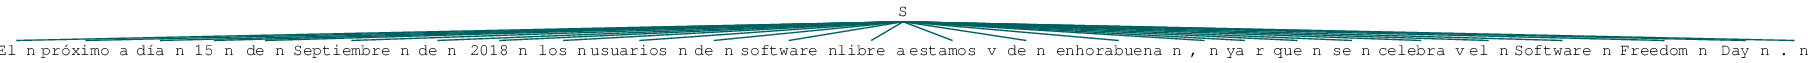

In [126]:
result = nltk.ne_chunk(tagged)
result

## Ahora es tu turno, ponte a prueba...

# Bibliografia

https://www.nltk.org/book/